In [46]:
# import relevant libraries & data
import pandas as pd
adult19 = pd.read_csv("data/adult19.csv")
adult20 = pd.read_csv("data/adult20.csv")
adult21 = pd.read_csv("data/adult21.csv")

In [47]:
# keep only relevant columns/variables
adult19 = adult19[['SRVY_YR', 'HHX', 'REGION', 'AGEP_A', 'SEX_A', 'EDUC_A', 'RACEALLP_A', 'ORIENT_A', 'MARITAL_A',
                'RATCAT_A', 'NATUSBORN_A', 'FDSCAT3_A', 'FWIC12M_A', 'PHSTAT_A', 'BMICAT_A', 'HICOV_A', 'MEDNG12M_A', 
                'LIVEBIRTH_A', 'PREGNOW_A', 'SOCSCLPAR_A', 'ANXFREQ_A', 'DEPFREQ_A', 'MHTHRPY_A']]

adult20 = adult20[['SRVY_YR', 'HHX', 'REGION', 'AGEP_A', 'SEX_A', 'EDUC_A', 'RACEALLP_A', 'ORIENT_A', 'MARITAL_A',
                'RATCAT_A', 'NATUSBORN_A', 'FDSCAT3_A', 'FWIC12M_A', 'PHSTAT_A', 'BMICAT_A', 'HICOV_A', 'MEDNG12M_A', 
                'LIVEBIRTH_A', 'PREGNOW_A', 'SOCSCLPAR_A', 'ANXFREQ_A', 'DEPFREQ_A', 'MHTHRPY_A']]

adult21 = adult21[['SRVY_YR', 'HHX', 'REGION', 'AGEP_A', 'SEX_A', 'EDUCP_A', 'RACEALLP_A', 'ORIENT_A', 'MARITAL_A',
                'RATCAT_A', 'NATUSBORN_A', 'FDSCAT3_A', 'FWIC12M_A', 'PHSTAT_A', 'BMICAT_A', 'HICOV_A', 'MEDNG12M_A', 
                'LIVEBIRTH_A', 'PREGNOW_A', 'SOCSCLPAR_A', 'ANXFREQ_A', 'DEPFREQ_A', 'MHTHRPY_A']]

adult21 = adult21.rename(columns = {'EDUCP_A':'EDUC_A'})

In [48]:
# merge three datasets
dataframe = pd.concat([adult19, adult20, adult21], axis=0)

In [49]:
df = dataframe.copy()

In [50]:
# change names of columns/variables
replace = {'SRVY_YR': 'survey_year', 'HHX': 'random_id', 'REGION': 'region', 'AGEP_A': 'age', 'SEX_A': 'sex', 'EDUC_A': 'education', 'RACEALLP_A': 'race', 'ORIENT_A': 'sex_orient', 'MARITAL_A': 'marital_stat',
           'RATCAT_A': 'inc_pov_ratio', 'NATUSBORN_A': 'us_born', 'FDSCAT3_A': 'food_security', 'FWIC12M_A': 'wic_benefits_12m', 'PHSTAT_A': 'phys_health', 'BMICAT_A': 'bmi', 'HICOV_A': 'health_insur', 
           'MEDNG12M_A': 'med_care_12m', 'LIVEBIRTH_A': 'live_birth_12m', 'PREGNOW_A': 'pregnant_now', 'SOCSCLPAR_A': 'soc_participation', 'ANXFREQ_A': 'anx_frequency', 'DEPFREQ_A': 'dep_frequency', 
           'MHTHRPY_A': 'mh_care_12m'}

df = df.rename(columns = replace)

In [51]:
# key criteria (live births)
df = df[df['live_birth_12m'] == 1] # keep individuals who have had a live birth in the past 12 months

In [52]:
# count the number of individuals with live births in the past 12 months
df['live_birth_12m'].value_counts()

1.0    1098
Name: live_birth_12m, dtype: int64

In [53]:
# count total NaN at each column
df.isnull().sum()

survey_year          0
random_id            0
region               0
age                  0
sex                  0
education            0
race                 0
sex_orient           0
marital_stat         0
inc_pov_ratio        0
us_born              0
food_security        0
wic_benefits_12m     1
phys_health          0
bmi                  0
health_insur         0
med_care_12m         0
live_birth_12m       0
pregnant_now         0
soc_participation    0
anx_frequency        0
dep_frequency        0
mh_care_12m          0
dtype: int64

In [54]:
# recode data for missingness & regrouping
import numpy as np

for row in df['age']:
    if row > 96:
        df['age'] = df['age'].replace(row, np.nan) 
        
for row in df['sex']:
    if row > 6:
        df['sex'] = df['sex'].replace(row, np.nan) 

for row in df['education']: # recoded (10 = professional or doctoral degree)
    if row > 96:
        df['education'] = df['education'].replace(row, np.nan)
    if row == 11:
        df['education'] = df['education'].replace(row, 10)
               
for row in df['race']: # recoded (5 = other)
    if row > 6:
        df['race'] = df['race'].replace(row, np.nan)
    if row == 6:
        df['race'] = df['race'].replace(row, 5)
        
for row in df['sex_orient']: # recoded (1 = lgbt+, 2 = straight)
    if row > 4:
        df['sex_orient'] = df['sex_orient'].replace(row, np.nan)
    if row == 3 or row == 4:
        df['sex_orient'] = df['sex_orient'].replace(row, 1) 

for row in df['marital_stat']: # recoded (1 = married, 2 = single)
    if row > 6:
        df['marital_stat'] = df['marital_stat'].replace(row, np.nan)
    if row == 3:
        df['marital_stat'] = df['marital_stat'].replace(row, 2) 

for row in df['inc_pov_ratio']:
    if row > 97:
        df['inc_pov_ratio'] = df['inc_pov_ratio'].replace(row, np.nan) 
                
for row in df['us_born']:
    if row > 6:
        df['us_born'] = df['us_born'].replace(row, np.nan) 

for row in df['food_security']:
    if row > 6:
        df['food_security'] = df['food_security'].replace(row, np.nan)  
        
for row in df['wic_benefits_12m']:
    if row > 6:
        df['wic_benefits_12m'] = df['wic_benefits_12m'].replace(row, np.nan)        

for row in df['phys_health']:
    if row > 6:
        df['phys_health'] = df['phys_health'].replace(row, np.nan) 
        
for row in df['bmi']:
    if row > 6:
        df['bmi'] = df['bmi'].replace(row, np.nan) 

for row in df['health_insur']:
    if row > 6:
        df['health_insur'] = df['health_insur'].replace(row, np.nan) 

for row in df['med_care_12m']:
    if row > 6:
        df['med_care_12m'] = df['med_care_12m'].replace(row, np.nan) 

for row in df['pregnant_now']:
    if row > 6:
        df['pregnant_now'] = df['pregnant_now'].replace(row, np.nan) 
        
for row in df['soc_participation']:
    if row > 6:
        df['soc_participation'] = df['soc_participation'].replace(row, np.nan) 
        
for row in df['anx_frequency']:
    if row > 6:
        df['anx_frequency'] = df['anx_frequency'].replace(row, np.nan) 

for row in df['dep_frequency']:
    if row > 6:
        df['dep_frequency'] = df['dep_frequency'].replace(row, np.nan)         
        
for row in df['mh_care_12m']:
    if row > 6:
        df['mh_care_12m'] = df['mh_care_12m'].replace(row, np.nan)

In [55]:
# count total NaN at each column
df.isnull().sum()

survey_year           0
random_id             0
region                0
age                   1
sex                   0
education             2
race                 94
sex_orient           29
marital_stat         21
inc_pov_ratio         0
us_born              18
food_security        29
wic_benefits_12m     30
phys_health           0
bmi                  34
health_insur          1
med_care_12m          0
live_birth_12m        0
pregnant_now          1
soc_participation     0
anx_frequency         6
dep_frequency         6
mh_care_12m           5
dtype: int64

In [56]:
# check missing data for individuals
df.isnull().sum(axis=1).sort_values(ascending=False)

9409     8
11487    8
9412     8
6607     8
25672    6
        ..
29238    0
29285    0
29424    0
29541    0
29456    0
Length: 1098, dtype: int64

In [57]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098 entries, 60 to 29456
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   survey_year        1098 non-null   int64  
 1   random_id          1098 non-null   object 
 2   region             1098 non-null   int64  
 3   age                1097 non-null   float64
 4   sex                1098 non-null   int64  
 5   education          1096 non-null   float64
 6   race               1004 non-null   float64
 7   sex_orient         1069 non-null   float64
 8   marital_stat       1077 non-null   float64
 9   inc_pov_ratio      1098 non-null   int64  
 10  us_born            1080 non-null   float64
 11  food_security      1069 non-null   float64
 12  wic_benefits_12m   1068 non-null   float64
 13  phys_health        1098 non-null   int64  
 14  bmi                1064 non-null   float64
 15  health_insur       1097 non-null   float64
 16  med_care_12m       109

In [58]:
# change random_id from object to string
df['random_id'] = df['random_id'].astype('string') 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098 entries, 60 to 29456
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   survey_year        1098 non-null   int64  
 1   random_id          1098 non-null   string 
 2   region             1098 non-null   int64  
 3   age                1097 non-null   float64
 4   sex                1098 non-null   int64  
 5   education          1096 non-null   float64
 6   race               1004 non-null   float64
 7   sex_orient         1069 non-null   float64
 8   marital_stat       1077 non-null   float64
 9   inc_pov_ratio      1098 non-null   int64  
 10  us_born            1080 non-null   float64
 11  food_security      1069 non-null   float64
 12  wic_benefits_12m   1068 non-null   float64
 13  phys_health        1098 non-null   int64  
 14  bmi                1064 non-null   float64
 15  health_insur       1097 non-null   float64
 16  med_care_12m       109

In [59]:
# checking that data make sense (min, max, average)
df.describe()

,survey_year,region,age,sex,education,race,sex_orient,marital_stat,inc_pov_ratio,us_born,...,phys_health,bmi,health_insur,med_care_12m,live_birth_12m,pregnant_now,soc_participation,anx_frequency,dep_frequency,mh_care_12m
count,1098.000000,1098.000000,1097.000000,1098.0,1096.000000,1004.000000,1069.000000,1077.000000,1098.000000,1080.000000,...,1098.000000,1064.000000,1097.000000,1098.000000,1098.0,1097.000000,1098.000000,1092.000000,1092.000000,1093.000000
mean,2019.947177,2.705829,31.173200,2.0,6.267336,1.426295,1.954163,1.309192,8.595628,1.232407,...,1.972678,2.907895,1.090246,1.932605,1.0,1.969918,1.086521,3.385531,4.267399,1.866423
std,0.848043,1.007711,5.537455,0.0,2.464111,0.893951,0.209230,0.462375,4.435136,0.422563,...,0.910378,0.854942,0.286665,0.250820,0.0,0.170891,0.373191,1.371001,1.046980,0.340353
min,2019.000000,1.000000,18.000000,2.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2019.000000,2.000000,27.000000,2.0,4.000000,1.000000,2.000000,1.000000,5.000000,1.000000,...,1.000000,2.000000,1.000000,2.000000,1.0,2.000000,1.000000,2.000000,4.000000,2.000000
50%,2020.000000,3.000000,31.000000,2.0,7.000000,1.000000,2.000000,1.000000,9.000000,1.000000,...,2.000000,3.000000,1.000000,2.000000,1.0,2.000000,1.000000,4.000000,5.000000,2.000000
75%,2021.000000,3.000000,35.000000,2.0,8.000000,1.000000,2.000000,2.000000,13.000000,1.000000,...,3.000000,4.000000,1.000000,2.000000,1.0,2.000000,1.000000,5.000000,5.000000,2.000000
max,2021.000000,4.000000,49.000000,2.0,10.000000,5.000000,2.000000,2.000000,14.000000,2.000000,...,5.000000,4.000000,2.000000,2.000000,1.0,2.000000,4.000000,5.000000,5.000000,2.000000


In [60]:
df = df.drop(columns = ['live_birth_12m', 'sex', 'random_id'])

In [61]:
# average difficulty participating in social activiies by race
groups = df.groupby(["race"])
groups["soc_participation"].mean()

race
1.0    1.099075
2.0    1.053030
3.0    1.012500
4.0    1.000000
5.0    1.193548
Name: soc_participation, dtype: float64

In [62]:
# average frequency of anxiety by race
groups["anx_frequency"].mean()

race
1.0    3.239680
2.0    3.742424
3.0    3.937500
4.0    3.250000
5.0    3.193548
Name: anx_frequency, dtype: float64

In [63]:
# average frequency of depression by race
groups["dep_frequency"].mean()

race
1.0    4.238349
2.0    4.295455
3.0    4.525000
4.0    4.750000
5.0    4.032258
Name: dep_frequency, dtype: float64

In [64]:
# frequency table of social participation
df["soc_participation"].value_counts()

1    1033
2      38
3      24
4       3
Name: soc_participation, dtype: int64

In [65]:
# frequency table of anxiety
df["anx_frequency"].value_counts()

4.0    333
5.0    280
2.0    184
3.0    151
1.0    144
Name: anx_frequency, dtype: int64

In [66]:
# frequency table of depression
df["dep_frequency"].value_counts()

5.0    616
4.0    285
3.0     92
2.0     65
1.0     34
Name: dep_frequency, dtype: int64

<AxesSubplot: xlabel='survey_year'>

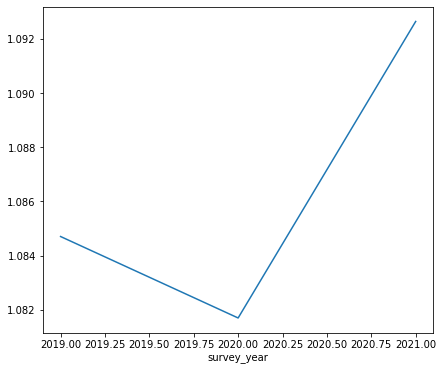

In [67]:
# average difficulty participating in social activiies by year
years = df.groupby(["survey_year"])
years["soc_participation"].mean()
years["soc_participation"].mean().plot(kind = "line", figsize = (7, 6))

<AxesSubplot: xlabel='survey_year'>

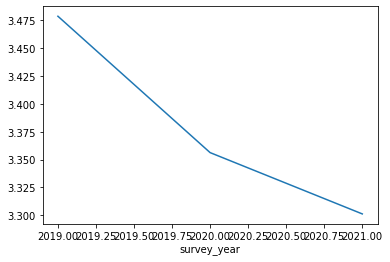

In [68]:
# average anxiety by year
years["anx_frequency"].mean()
years["anx_frequency"].mean().plot(kind = "line")

<AxesSubplot: xlabel='survey_year'>

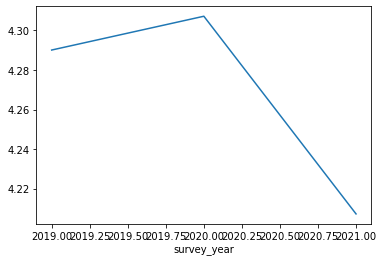

In [69]:
# average depression by year
years["dep_frequency"].mean()
years["dep_frequency"].mean().plot(kind = "line")

Note: you may need to restart the kernel to use updated packages.


[]

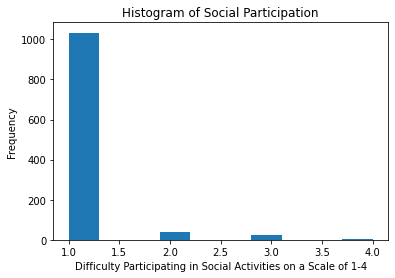

In [70]:
# histogram of social participation
%pip install matplotlib
import matplotlib .pyplot as plt

hist_soc = df["soc_participation"].plot.hist()
hist_soc.set_title("Histogram of Social Participation")
hist_soc.set_xlabel("Difficulty Participating in Social Activities on a Scale of 1-4")
plt.plot()

[]

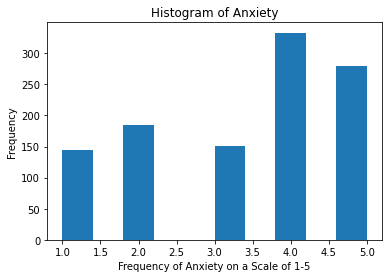

In [71]:
# histogram of anxiety
hist_anx = df["anx_frequency"].plot.hist()
hist_anx.set_title("Histogram of Anxiety")
hist_anx.set_xlabel("Frequency of Anxiety on a Scale of 1-5")
plt.plot()

[]

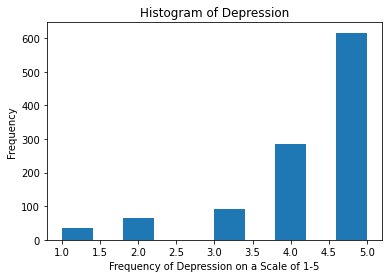

In [72]:
# histogram of depression
hist_dep = df["dep_frequency"].plot.hist()
hist_dep.set_title("Histogram of Depression")
hist_dep.set_xlabel("Frequency of Depression on a Scale of 1-5")
plt.plot()

Text(0, 0.5, 'Number of Participants')

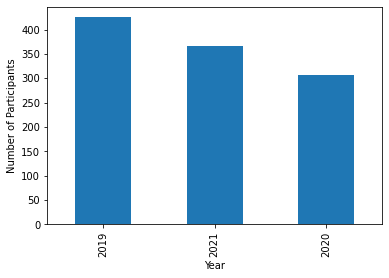

In [73]:
# bar chart for binary variable "year"
df["survey_year"].value_counts().plot(kind = "bar")
plt.xlabel("Year")
plt.ylabel("Number of Participants")

Text(0, 0.5, 'Number of Participants')

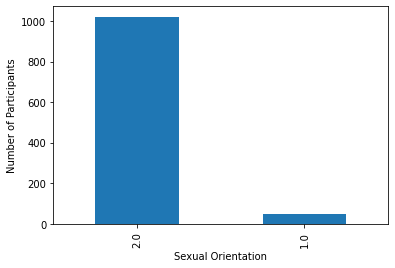

In [74]:
# bar charts for binary variable "sex_orient" - 1 lgbtq+, 2 straight
df["sex_orient"].value_counts().plot(kind = "bar")
plt.xlabel("Sexual Orientation")
plt.ylabel("Number of Participants")

Text(0, 0.5, 'Number of Participants')

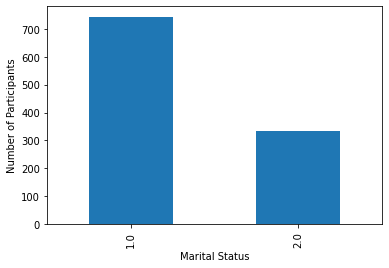

In [75]:
# bar charts for binary variable "marital_stat" - 1 married, 2 single
df["marital_stat"].value_counts().plot(kind = "bar")
plt.xlabel("Marital Status")
plt.ylabel("Number of Participants")

Text(0, 0.5, 'Number of Participants')

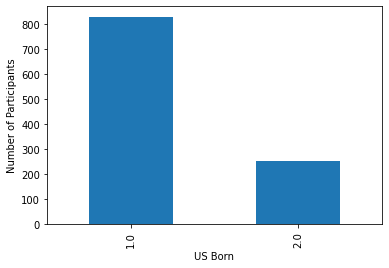

In [76]:
# bar charts for binary variable "us_born" - 1 us born, 2 not us born
df["us_born"].value_counts().plot(kind = "bar")
plt.xlabel("US Born")
plt.ylabel("Number of Participants")

Text(0, 0.5, 'Number of Participants')

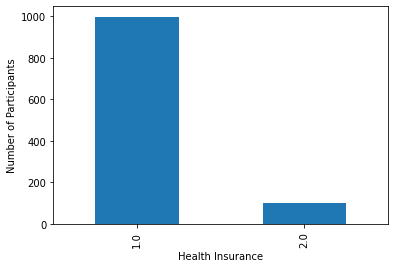

In [77]:
# bar charts for binary variable "health_insur" - 1 yes, 2 no health insurance
df["health_insur"].value_counts().plot(kind = "bar")
plt.xlabel("Health Insurance")
plt.ylabel("Number of Participants")

Text(0, 0.5, 'Number of Participants')

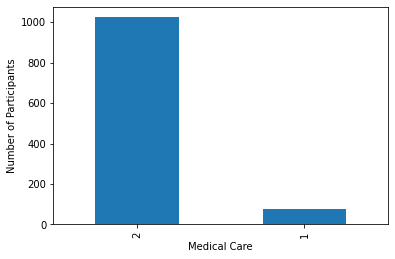

In [78]:
# bar charts for binary variable "med_care_12m" - 1 got needed medical care, 2 did not get required medical care
df["med_care_12m"].value_counts().plot(kind = "bar")
plt.xlabel("Medical Care")
plt.ylabel("Number of Participants")

Text(0, 0.5, 'Number of Participants')

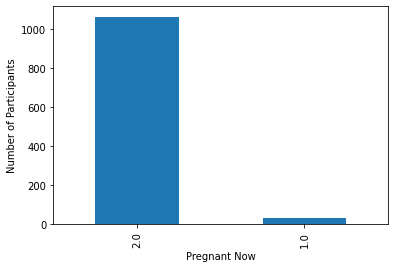

In [79]:
# bar charts for binary variable "pregnant_now" - 1 currently pregnant, 2 not currently pregnant
df["pregnant_now"].value_counts().plot(kind = "bar")
plt.xlabel("Pregnant Now")
plt.ylabel("Number of Participants")

Text(0, 0.5, 'Number of Participants')

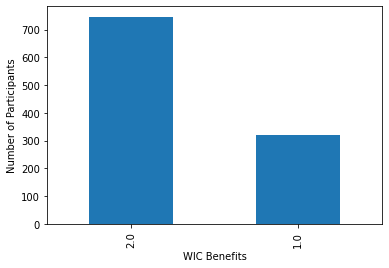

In [80]:
# bar charts for binary variable "wic_benefits_12m" - 1 received WIC benefis, 2 didn't receive WIC benefis
df["wic_benefits_12m"].value_counts().plot(kind = "bar")
plt.xlabel("WIC Benefits")
plt.ylabel("Number of Participants")

Text(0, 0.5, 'Number of Participants')

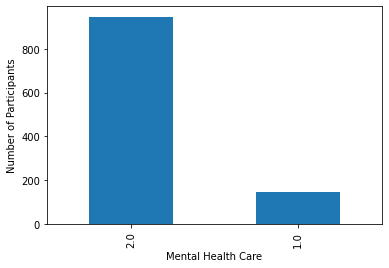

In [81]:
# bar charts for binary variable "mh_care_12m" - 1 received mh care, 2 didn't receive mh care
df["mh_care_12m"].value_counts().plot(kind = "bar")
plt.xlabel("Mental Health Care")
plt.ylabel("Number of Participants")

In [82]:
# summary stats of non-binary variables
df[["age", "inc_pov_ratio", "phys_health", "bmi", "food_security", "region", "education", "race"]].describe()

,age,inc_pov_ratio,phys_health,bmi,food_security,region,education,race
count,1097.000000,1098.000000,1098.000000,1064.000000,1069.000000,1098.000000,1096.000000,1004.000000
mean,31.173200,8.595628,1.972678,2.907895,1.144995,2.705829,6.267336,1.426295
std,5.537455,4.435136,0.910378,0.854942,0.464595,1.007711,2.464111,0.893951
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,27.000000,5.000000,1.000000,2.000000,1.000000,2.000000,4.000000,1.000000
50%,31.000000,9.000000,2.000000,3.000000,1.000000,3.000000,7.000000,1.000000
75%,35.000000,13.000000,3.000000,4.000000,1.000000,3.000000,8.000000,1.000000
max,49.000000,14.000000,5.000000,4.000000,3.000000,4.000000,10.000000,5.000000


<AxesSubplot: ylabel='Frequency'>

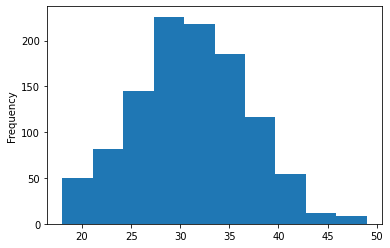

In [83]:
# histogram of non-binary variable "age"
df["age"].plot(kind = "hist")

<AxesSubplot: ylabel='Frequency'>

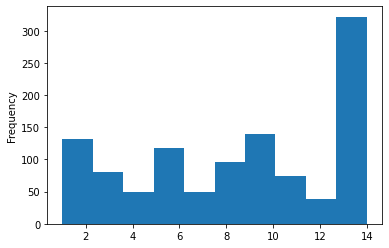

In [84]:
# histogram of non-binary variable "inc_pov_ratio" - higher # is richer
df["inc_pov_ratio"].plot(kind = "hist")

<AxesSubplot: ylabel='Frequency'>

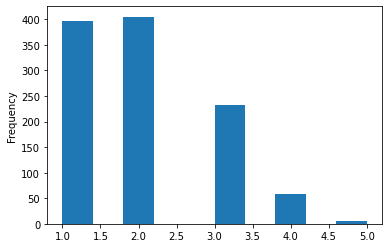

In [85]:
# histogram of non-binary variable "phys_health" - 1 excellent, 5 poor
df["phys_health"].plot(kind = "hist")

<AxesSubplot: ylabel='Frequency'>

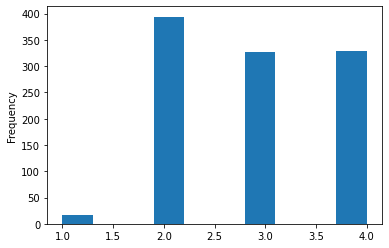

In [86]:
# histogram of non-binary variable "bmi" - 1 underweight, 4 obese
df["bmi"].plot(kind = "hist")

<AxesSubplot: ylabel='Frequency'>

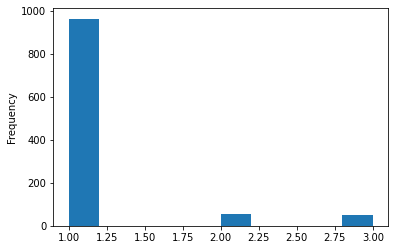

In [87]:
# histogram of non-binary variable "food_security" - 1 food secure, 3 very low food security
df["food_security"].plot(kind = "hist")

<AxesSubplot: ylabel='Frequency'>

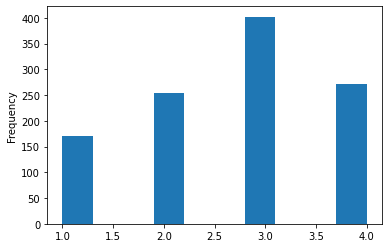

In [88]:
# histogram of non-binary variable "region" - 1 NE, 2 ME, 3 S, 4 W
df["region"].plot(kind = "hist")

<AxesSubplot: ylabel='Frequency'>

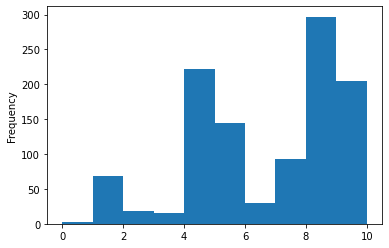

In [89]:
# histogram of non-binary variable "education" - 0 never attended/KG only, 10 professional school or doctoral degree
df["education"].plot(kind = "hist")

<AxesSubplot: ylabel='Frequency'>

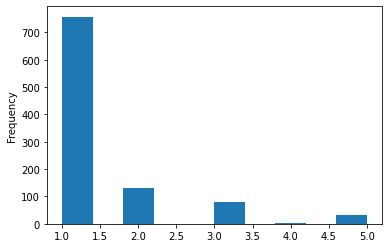

In [90]:
# histogram of non-binary variable "race" - 1 white, 2 black, 3 asian, 4 aian, 5 other
df["race"].plot(kind = "hist")

In [91]:
# correlation matrix of all variables in dataframe
corrm = df.corr()
corrm

,survey_year,region,age,education,race,sex_orient,marital_stat,inc_pov_ratio,us_born,food_security,wic_benefits_12m,phys_health,bmi,health_insur,med_care_12m,pregnant_now,soc_participation,anx_frequency,dep_frequency,mh_care_12m
survey_year,1.000000,-0.024600,0.008594,-0.026545,0.031482,-0.052554,0.028871,0.047393,0.006237,-0.079376,0.029451,-0.005413,0.043442,-0.025060,0.064675,-0.023566,0.008694,-0.055337,-0.032481,-0.009999
region,-0.024600,1.000000,-0.042540,-0.055469,0.105798,0.004124,0.026240,-0.079058,0.022394,-0.041168,-0.046760,0.054825,-0.001592,0.031765,-0.017199,-0.008783,-0.002554,0.041998,0.030867,0.045677
age,0.008594,-0.042540,1.000000,0.346523,0.063914,0.085391,-0.242966,0.314467,0.129861,-0.151255,0.322844,-0.047951,-0.049664,-0.085740,0.029429,0.076767,-0.088025,0.072177,0.111097,-0.010751
education,-0.026545,-0.055469,0.346523,1.000000,0.018794,0.100575,-0.464905,0.672945,-0.087093,-0.265454,0.470852,-0.326387,-0.225722,-0.269600,0.189453,0.067404,-0.167091,-0.007003,0.164704,0.020323
race,0.031482,0.105798,0.063914,0.018794,1.000000,0.009401,0.096041,-0.079610,0.285357,-0.020121,-0.112591,0.062850,-0.008791,-0.054089,0.002717,-0.024131,-0.014689,0.098264,0.024321,0.071692
sex_orient,-0.052554,0.004124,0.085391,0.100575,0.009401,1.000000,-0.075639,0.061810,0.024639,-0.142761,0.085096,-0.119684,-0.034357,-0.010856,0.101723,0.013961,-0.151637,0.094845,0.155709,0.123079
marital_stat,0.028871,0.026240,-0.242966,-0.464905,0.096041,-0.075639,1.000000,-0.507895,-0.046905,0.233081,-0.465087,0.255974,0.135115,0.080319,-0.118550,-0.012979,0.126095,0.005761,-0.126277,-0.008473
inc_pov_ratio,0.047393,-0.079058,0.314467,0.672945,-0.079610,0.061810,-0.507895,1.000000,-0.070852,-0.302508,0.604318,-0.355842,-0.243447,-0.268233,0.187718,0.064867,-0.150677,-0.000691,0.186663,0.020323
us_born,0.006237,0.022394,0.129861,-0.087093,0.285357,0.024639,-0.046905,-0.070852,1.000000,0.006758,-0.043678,0.027707,-0.103664,0.213176,-0.052694,0.057463,-0.076265,0.177038,0.106074,0.061263
food_security,-0.079376,-0.041168,-0.151255,-0.265454,-0.020121,-0.142761,0.233081,-0.302508,0.006758,1.000000,-0.246726,0.288405,0.107764,0.109252,-0.301887,-0.090052,0.226549,-0.155160,-0.219700,-0.042886


In [92]:
# variables most highly positively correlated with the variable "social participation"
pos_cor = corrm['soc_participation'] > 0
corrm['soc_participation'][pos_cor].sort_values(ascending = False).to_frame()

,soc_participation
soc_participation,1.000000
food_security,0.226549
phys_health,0.218931
marital_stat,0.126095
health_insur,0.063312
bmi,0.042848
survey_year,0.008694


In [93]:
# variables most highly negatively correlated with the variable "social participation"
neg_cor = corrm['soc_participation'] < 0
corrm['soc_participation'][neg_cor].sort_values(ascending = True).to_frame()

,soc_participation
dep_frequency,-0.330855
anx_frequency,-0.295942
mh_care_12m,-0.232443
education,-0.167091
wic_benefits_12m,-0.160552
sex_orient,-0.151637
inc_pov_ratio,-0.150677
med_care_12m,-0.093467
age,-0.088025
us_born,-0.076265


In [94]:
# variables most highly positively correlated with the variable "anxiety"
pos_cor = corrm['anx_frequency'] > 0
corrm['anx_frequency'][pos_cor].sort_values(ascending = False).to_frame()

,anx_frequency
anx_frequency,1.000000
dep_frequency,0.568586
mh_care_12m,0.304913
us_born,0.177038
race,0.098264
sex_orient,0.094845
med_care_12m,0.078510
age,0.072177
region,0.041998
wic_benefits_12m,0.028897


In [95]:
# variables most highly negatively correlated with the variable "anxiety"
neg_cor = corrm['anx_frequency'] < 0
corrm['anx_frequency'][neg_cor].sort_values(ascending = True).to_frame()

,anx_frequency
soc_participation,-0.295942
phys_health,-0.188808
food_security,-0.155160
survey_year,-0.055337
bmi,-0.039679
education,-0.007003
inc_pov_ratio,-0.000691


In [96]:
# variables most highly positively correlated with the variable "anxiety"
pos_cor = corrm['dep_frequency'] > 0
corrm['dep_frequency'][pos_cor].sort_values(ascending = False).to_frame()

,dep_frequency
dep_frequency,1.000000
anx_frequency,0.568586
mh_care_12m,0.388357
wic_benefits_12m,0.190071
inc_pov_ratio,0.186663
education,0.164704
sex_orient,0.155709
med_care_12m,0.152448
age,0.111097
us_born,0.106074


In [97]:
# variables most highly negatively correlated with the variable "anxiety"
neg_cor = corrm['dep_frequency'] < 0
corrm['dep_frequency'][neg_cor].sort_values(ascending = True).to_frame()

,dep_frequency
soc_participation,-0.330855
phys_health,-0.272680
food_security,-0.219700
bmi,-0.131245
marital_stat,-0.126277
survey_year,-0.032481
pregnant_now,-0.001012


In [98]:
df.to_csv("data/cleaned_merged_adult_data.csv", encoding = "utf-8", index=False)

In [99]:
import pandas as pd
# import second dataset
dataframe = pd.read_csv("data/mh_reg.csv")
# keep only relevant columns/variables
dataframe_2 = dataframe[['SPHSERVICE', 'CMPSERVICE', 'OPISERVICE', 'RTCSERVICE', 'IJSSERVICE', 'REGION']]
# change names of columns/variables
dataframe_2 = dataframe_2.rename(columns = {'SPHSERVICE':'psych_hospital', 'CMPSERVICE':'mh_program', 'OPISERVICE':'psych_inpatient', 
                                            'RTCSERVICE':'residential_center', 'IJSSERVICE':'inst_justice', 'REGION':'region'})

In [100]:
df_2 = dataframe_2.copy()

In [101]:
# key criteria (region)
df_2.dropna(subset=['region']) # remove individuals who do not have data for a key variable
df_2['region'].value_counts() # count the number of individuals in each region

4    9734
3    9720
2    9271
1    6260
0      15
Name: region, dtype: int64

In [102]:
# remove "0" regions
df_2 = df_2[df_2['region'] > 0]

In [103]:
# checking that data make sense (min, max, average)
df_2.describe()

,psych_hospital,mh_program,psych_inpatient,residential_center,inst_justice,region
count,34985.000000,34985.000000,34985.000000,34985.000000,34985.000000,34985.000000
mean,1.981964,1.025325,1.962927,1.990139,1.990910,2.655367
std,0.133085,0.157113,0.188943,0.098815,0.094907,1.067815
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000
75%,2.000000,1.000000,2.000000,2.000000,2.000000,4.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000


In [104]:
# grouping by region
groups_2 = df_2.groupby(["region"]) 
df_2 = groups_2["psych_hospital", "mh_program", "psych_inpatient", "residential_center", "inst_justice"].sum()

<ipython-input-104-ba3571a5765e>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_2 = groups_2["psych_hospital", "mh_program", "psych_inpatient", "residential_center", "inst_justice"].sum()


In [105]:
df_2

,psych_hospital,mh_program,psych_inpatient,residential_center,inst_justice
region,,,,,
1,12451,6408,12210,12461,12415
2,18416,9428,18234,18408,18509
3,19120,10073,19030,19370,19439
4,19352,9962,19199,19386,19289


In [106]:
merged_df = pd.merge(df, df_2, on = "region", how="left")
merged_df

,survey_year,region,age,education,race,sex_orient,marital_stat,inc_pov_ratio,us_born,food_security,...,pregnant_now,soc_participation,anx_frequency,dep_frequency,mh_care_12m,psych_hospital,mh_program,psych_inpatient,residential_center,inst_justice
0,2019,4,28.0,4.0,1.0,2.0,1.0,3,1.0,1.0,...,2.0,1,5.0,5.0,2.0,19352,9962,19199,19386,19289
1,2019,3,31.0,9.0,1.0,2.0,1.0,9,1.0,1.0,...,2.0,1,4.0,5.0,2.0,19120,10073,19030,19370,19439
2,2019,4,40.0,1.0,1.0,2.0,2.0,7,2.0,1.0,...,2.0,1,5.0,5.0,2.0,19352,9962,19199,19386,19289
3,2019,4,24.0,4.0,NaN,2.0,2.0,5,1.0,1.0,...,2.0,1,1.0,2.0,2.0,19352,9962,19199,19386,19289
4,2019,4,36.0,9.0,1.0,1.0,1.0,14,1.0,1.0,...,1.0,1,4.0,4.0,1.0,19352,9962,19199,19386,19289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,2021,3,29.0,9.0,2.0,2.0,1.0,8,2.0,1.0,...,2.0,1,5.0,5.0,2.0,19120,10073,19030,19370,19439
1094,2021,1,29.0,4.0,1.0,2.0,2.0,9,1.0,1.0,...,2.0,1,2.0,5.0,2.0,12451,6408,12210,12461,12415
1095,2021,3,24.0,5.0,1.0,2.0,1.0,8,1.0,1.0,...,2.0,1,1.0,1.0,1.0,19120,10073,19030,19370,19439
1096,2021,4,28.0,4.0,5.0,2.0,2.0,3,1.0,1.0,...,2.0,2,1.0,2.0,1.0,19352,9962,19199,19386,19289


In [107]:
merged_df.to_csv("data/cleaned_merged_total_data.csv", encoding = "utf-8", index=False)